<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Objectives</a></span></li></ul></li><li><span><a href="#Initial-Data-Processing" data-toc-modified-id="Initial-Data-Processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial Data Processing</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-The-Dataset" data-toc-modified-id="Loading-The-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading The Dataset</a></span></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Initial Data Exploration</a></span></li></ul></li><li><span><a href="#Data-Cleaning-and-Preprocessing" data-toc-modified-id="Data-Cleaning-and-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Handling-Missing-Values" data-toc-modified-id="Handling-Missing-Values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Handling Missing Values</a></span></li><li><span><a href="#Irrelevant-Column-Removal" data-toc-modified-id="Irrelevant-Column-Removal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Irrelevant Column Removal</a></span></li><li><span><a href="#Data-Type-Conversion" data-toc-modified-id="Data-Type-Conversion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Type Conversion</a></span></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Extracting-Hard-Skills-and-Soft-Skills" data-toc-modified-id="Extracting-Hard-Skills-and-Soft-Skills-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Extracting Hard Skills and Soft Skills</a></span></li><li><span><a href="#Extracting-Education-Requirements" data-toc-modified-id="Extracting-Education-Requirements-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extracting Education Requirements</a></span></li><li><span><a href="#Extracting-Experience-Requirements" data-toc-modified-id="Extracting-Experience-Requirements-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extracting Experience Requirements</a></span></li><li><span><a href="#Categorizing-'via'-column" data-toc-modified-id="Categorizing-'via'-column-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Categorizing 'via' column</a></span></li><li><span><a href="#Handling-'schedule_type'-Column" data-toc-modified-id="Handling-'schedule_type'-Column-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Handling 'schedule_type' Column</a></span></li></ul></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>One-Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#Encoding-Hard-Skills-and-Soft-Skills" data-toc-modified-id="Encoding-Hard-Skills-and-Soft-Skills-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Encoding Hard Skills and Soft Skills</a></span><ul class="toc-item"><li><span><a href="#Hard-Skills" data-toc-modified-id="Hard-Skills-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Hard Skills</a></span></li><li><span><a href="#Soft-Skills" data-toc-modified-id="Soft-Skills-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Soft Skills</a></span></li></ul></li><li><span><a href="#Encoding-Education-and-Experience-Requirements" data-toc-modified-id="Encoding-Education-and-Experience-Requirements-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Encoding Education and Experience Requirements</a></span></li></ul></li></ul></div>

# Introduction

This notebook will involve cleaning datasets.

## Project Description

This notebooks goal is to transform multiple diverse datasets into a single, unified schema that will facilitate further analysis. The desired schema is as follows:

- `Job Title`
- `Company Name`
- `Industry`
- `Location`
- `Via` (the platform through which the job was posted)
- `Salary Lower Bound`
- `Salary Upper Bound`
- `Description` (the job description, from which we can extract required skills)

Following this preprocessing and cleaning phase, the next step (carried out in a separate notebook) will be to analyze the cleaned data, exploring relationships and trends and, hopefully, gaining new insights into the data job market.

## Dataset Description

This dataset pulls job postings from Google's search results for Data Analyst positions in the United States.

This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search).

Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily.

Dataset state used is from August 2nd, 2023.

## Objectives

# Initial Data Processing

## Importing Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Loading The Dataset

In [2]:
df = pd.read_csv('../data/gsearch_jobs.csv')

## Initial Data Exploration

In [3]:
df.shape

(24734, 27)

In [4]:
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Robert Half,"Oklahoma City, OK",via LinkedIn,Description\n\nRobert Half is looking for a pr...,"['24 hours ago', 'Contractor', 'Health insuran...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['go']
1,1,1,Data Analyst,Apex Health Solutions,United States,via LinkedIn,Data Analyst Summary Apex Health Solutions is ...,"['21 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['azure', 'sql', 'excel', 'power_bi']"
2,2,2,Marketing Data Analyst,Ledger Bennett,Anywhere,via LinkedIn,"At Ledger Bennett, we strive to help our emplo...","['21 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBBbmFseX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'excel', 'tableau']"
3,3,3,"Boolean Search Data Analyst | $54,000-$108,000...",IT Pros,Anywhere,via Indeed,Company Description\n\nJoin a world-class data...,"['14 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJCb29sZWFuIFNlYXJjaCBEYXRhIE...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,4,4,Product Data Analyst - Ditch Witch - Now Hiring,The Toro Company,"Perry, OK",via Snagajob,Who Are We? \n\nOur plant in West Salem sta...,"['22 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJQcm9kdWN0IERhdGEgQW5hbHlzdC...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'assembly', 'sap']"


In [5]:
df.describe()

,Unnamed: 0,index,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,24734.000000,24734.000000,0.0,4628.000000,4347.000000,4347.000000,2828.000000,1792.000000,4628.000000
mean,12366.500000,1155.197501,NaN,39213.495124,33064.881799,46824.467649,44.401211,101174.656702,95738.464306
std,7140.235115,780.342348,NaN,52500.728179,44097.407835,62398.783381,23.435111,29191.598499,42438.711180
min,0.000000,0.000000,NaN,9.000000,8.000000,10.000000,9.000000,29289.840000,18720.000000
25%,6183.250000,524.000000,NaN,32.500000,20.000000,45.000000,28.500000,85000.000000,64950.000000
50%,12366.500000,1086.000000,NaN,60.000000,50.000000,75.000000,40.000000,96500.000000,96500.000000
75%,18549.750000,1648.750000,NaN,93778.195000,77000.000000,110175.000000,57.500000,111175.000000,119600.000000
max,24733.000000,3822.000000,NaN,233500.000000,215000.000000,283000.000000,300.000000,233500.000000,624000.000000


In [6]:
df.dtypes

Unnamed: 0               int64
index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
job_id                  object
thumbnail               object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
commute_time           float64
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
dtype: object

# Data Cleaning and Preprocessing

## Handling Missing Values

In [7]:
df.isnull().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  19
via                        0
description                0
extensions                 0
job_id                     0
thumbnail              11800
posted_at                  0
schedule_type            163
work_from_home         13646
salary                 20106
search_term                0
date_time                  0
search_location            0
commute_time           24734
salary_pay             20106
salary_rate            20106
salary_avg             20106
salary_min             20387
salary_max             20387
salary_hourly          21906
salary_yearly          22942
salary_standardized    20106
description_tokens         0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Irrelevant Column Removal

In [9]:
# Dropping irrelevant columns (for our use)
df = df.drop(['job_id', 'thumbnail', 'commute_time' , 'Unnamed: 0', 'index', 'extensions', 
              'posted_at', 'schedule_type', 'work_from_home', 'search_term', 'date_time', 'search_location', 
              'salary_pay', 'salary_rate', 'salary_avg', 'salary_hourly', 
              'salary_yearly', 'salary_standardized', 'description_tokens'], axis=1)

In [10]:
df.to_csv('../data/gsearch_jobs.csv', index=False)

In [11]:
df.dtypes

title            object
company_name     object
location         object
via              object
description      object
salary           object
salary_min      float64
salary_max      float64
dtype: object

In [12]:
df

,title,company_name,location,via,description,salary,salary_min,salary_max
0,Data Analyst,Robert Half,"Oklahoma City, OK",via LinkedIn,Description\n\nRobert Half is looking for a pr...,NaN,NaN,NaN
1,Data Analyst,Apex Health Solutions,United States,via LinkedIn,Data Analyst Summary Apex Health Solutions is ...,NaN,NaN,NaN
2,Marketing Data Analyst,Ledger Bennett,Anywhere,via LinkedIn,"At Ledger Bennett, we strive to help our emplo...",NaN,NaN,NaN
3,"Boolean Search Data Analyst | $54,000-$108,000...",IT Pros,Anywhere,via Indeed,Company Description\n\nJoin a world-class data...,NaN,NaN,NaN
4,Product Data Analyst - Ditch Witch - Now Hiring,The Toro Company,"Perry, OK",via Snagajob,Who Are We? \n\nOur plant in West Salem sta...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
24729,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","76,798–130,764 a year",76798.0,130764.0
24730,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","106,916–182,047 a year",106916.0,182047.0
24731,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","106,916–182,047 a year",106916.0,182047.0
24732,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","106,916–182,047 a year",106916.0,182047.0


In [13]:
df.isnull().sum()

title               0
company_name        0
location           19
via                 0
description         0
salary          20106
salary_min      20387
salary_max      20387
dtype: int64

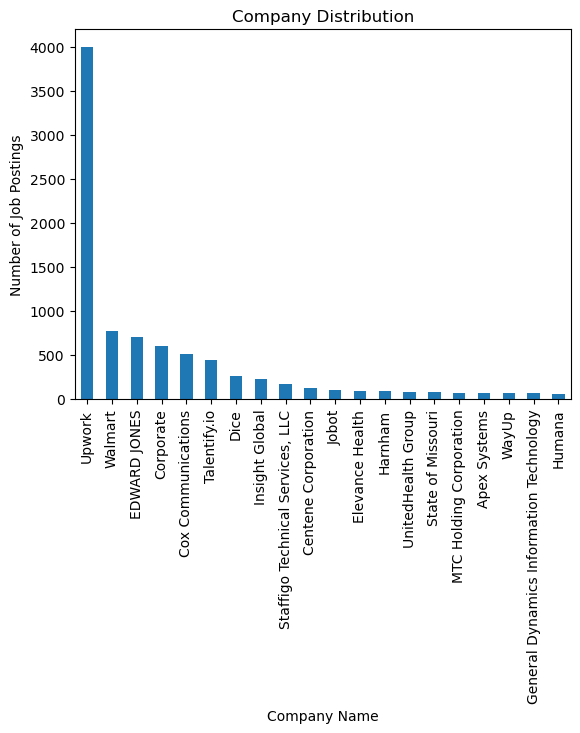

In [14]:
# Plot the distribution of the 'company_name' column
company_distribution = df['company_name'].value_counts()
company_distribution[:20].plot(kind='bar')  # We only take the top 20 for readability
plt.title('Company Distribution')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.show()

In [15]:
df.shape

(24734, 8)

## Data Type Conversion

# Feature Extraction

We will be going through the job descriptions and extracting features from the postings including Hard Skills, Soft skills, Education, and Experience.

In [16]:
# Step 1: Lowercasing
df['description'] = df['description'].str.lower()

In [17]:
# Step 2: Removing Punctuation
df['description'] = df['description'].str.replace(r'\W', ' ', regex=True)

In [18]:
# Step 3: Removing Stop Words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if not word in stop_words]
    return " ".join(filtered_text)

df['description'] = df['description'].apply(remove_stopwords)

In [19]:
# Step 4: Counting word frequencies
def count_words(text):
    word_tokens = word_tokenize(text)
    word_freq = Counter(word_tokens)
    return word_freq

# Apply the function to each description
df['word_counts'] = df['description'].apply(count_words)

In [20]:
# Initialize an empty counter
total_word_counts = Counter()

# Update it with each counter
for word_count in df['word_counts']:
    total_word_counts.update(word_count)

In [21]:
# Get a list of all words with their frequencies
word_frequencies = total_word_counts.items()

# Filter the list to include only the words that occur more than 100 times
common_words = [(word, count) for word, count in word_frequencies if count > 100]

# Sort the words by their frequency
common_words_sorted = sorted(common_words, key=lambda x: x[1], reverse=True)

# Print the sorted words
for word, count in common_words_sorted:
   print(word, count)

data 263148
experience 102911
business 89905
work 71139
analysis 49544
skills 44626
team 41802
analytics 40457
ability 35835
management 33281
support 31896
years 31583
analyst 30096
information 29841
including 28695
related 28529
tools 26920
reporting 26246
required 26204
knowledge 25931
requirements 25905
sql 23917
working 23717
job 23661
solutions 23252
degree 23039
health 22713
role 22419
position 22350
preferred 22340
strong 22297
using 21841
reports 21551
development 21233
company 21036
quality 19898
insights 19854
technical 19759
benefits 19740
time 19715
provide 19603
develop 19422
best 19393
new 18727
systems 18458
science 18089
opportunity 18063
identify 17270
qualifications 17246
analytical 16988
status 16971
based 16889
teams 16624
projects 16576
process 16487
processes 16414
help 16404
across 16305
us 15922
complex 15505
needs 14932
field 14869
understanding 14817
project 14771
employment 14657
technology 14650
environment 14587
key 14468
financial 14304
responsibilities 14

In [22]:
print(f"There are {len(common_words_sorted)} words with over 100 instances in the dataset.")

There are 4986 words with over 100 instances in the dataset.


In [23]:
# Get a list of all words with their frequencies
word_frequencies = total_word_counts.items()

# Filter the list to include only the words that occur more than 1000 times
common_words = [(word, count) for word, count in word_frequencies if count > 1000]

# Sort the words by their frequency
common_words_sorted = sorted(common_words, key=lambda x: x[1], reverse=True)

print(f"There are {len(common_words_sorted)} words with over 1000 instances in the dataset.")

There are 1372 words with over 1000 instances in the dataset.


In [24]:
# Get a list of all words with their frequencies
word_frequencies = total_word_counts.items()

# Filter the list to include only the words that occur more than 500 times
common_words = [(word, count) for word, count in word_frequencies if count > 500]

# Sort the words by their frequency
common_words_sorted = sorted(common_words, key=lambda x: x[1], reverse=True)

print(f"There are {len(common_words_sorted)} words with over 500 instances in the dataset.")

There are 2108 words with over 500 instances in the dataset.


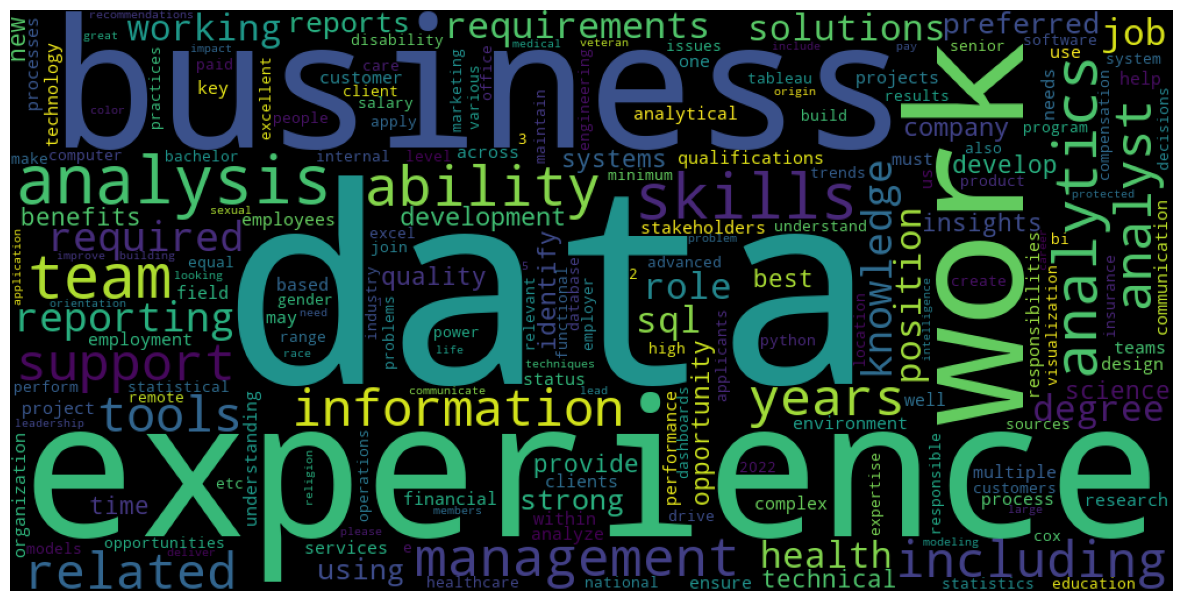

In [25]:
# Convert list of tuples into a dictionary
word_dict = dict(common_words_sorted)

# Generate word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

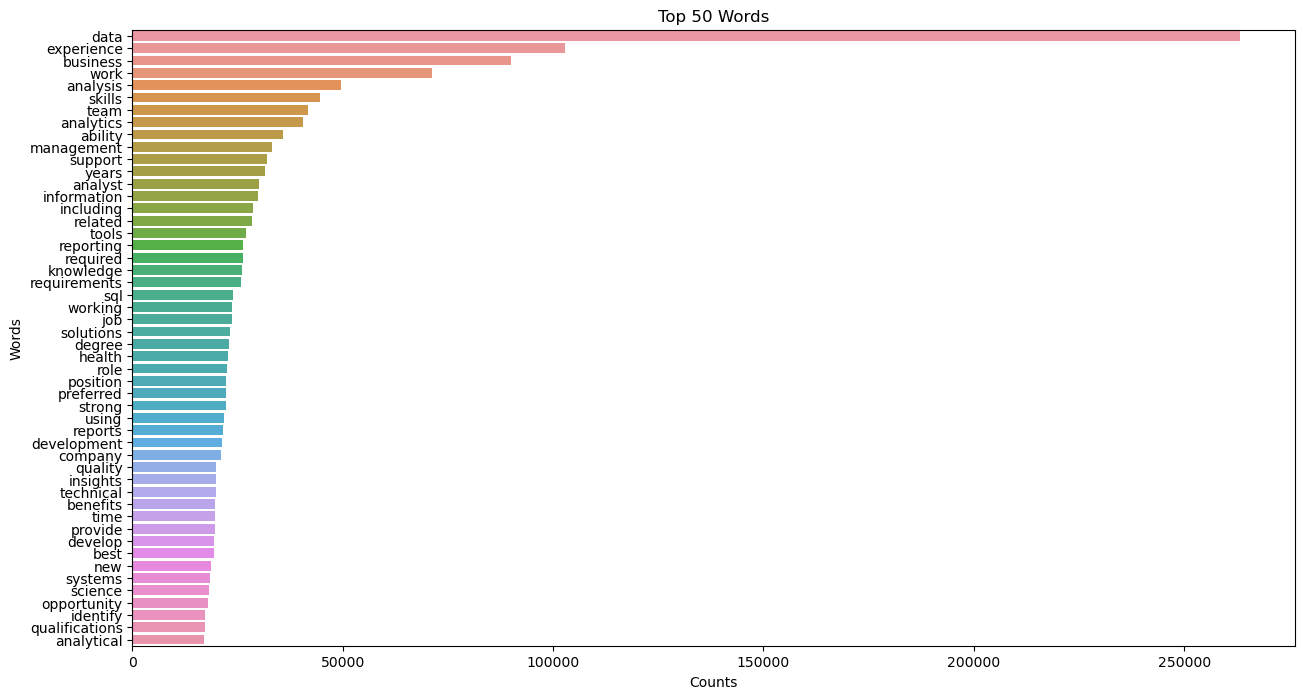

In [26]:
top_n = 50
words = [item[0] for item in common_words_sorted[:top_n]]
counts = [item[1] for item in common_words_sorted[:top_n]]

# Create a DataFrame
df_top_n = pd.DataFrame(list(zip(words, counts)), columns=['Words', 'Counts'])

# Plot
plt.figure(figsize=(15,8))
sns.barplot(x='Counts', y='Words', data=df_top_n)
plt.title(f"Top {top_n} Words")
plt.show()

## Extracting Hard Skills and Soft Skills

Current temp state: Going through the list of 4762 words with over 100 frequency in the dataset to identify if they are related to hard skills or soft skills.

Covered 2500 most frequent words so far:

In [27]:
# Defined hard skills
hard_skills = ["analysis", "analytics", "sql", "reporting", "tools", "development", 
               "technical", "science", "statistical", "excel", "visualization", 
               "python", "software", "engineering", "database", "modeling", 
               "techniques", "mathematics", "languages", "programming", 
               "cloud", "etl", "automation", "oracle", "machine", "processing", "document",
               "warehouse", "administration", "efficiency", "proficient",
               "powerbi", "language", "coding", "software development",
               "salesforce", "architecture", "server", "maintenance",
               "validation", "predictive", "aws", "azure", "snowflake",
               "powerpoint", "word", "web", "mapping", "scripting", "sap",
               "structured", "ai", "intermediate", "descriptive", "storage",
               "pipelines", "pivot", "analysis", "analytics", "conducting", "measurement", 
               "operating", "auditing", "workflow", "automation", "algorithm", 
               "logic", "troubleshooting", "scripting", "regression", 
               "data_cleaning", "data_profiling", "data_visualization", 
               "project_management", "querying", "machine_learning", 
               "statistical_analysis", "data_management",
               "optimal", "link", "configuration", "sourcing", "percent", "input", "ml", "collecting",
               "electronic", "coordination", "adobe", "extraction", "hadoop", "efficiently", 
               "qa", "secure", "implementations", "java", "sharepoint", "speed", "classification",
               "visa", "met", "kpi", "microstrategy", "criteria", "stack", "warehouses", "javascript",
               "visualize", "accessibility", "logical", "modelling", "scrum", "xml", "definition",
               "protocols", "outlook", "qlik", "calculations", "ssrs", "slas", "ssis", "lineage",
               "nosql", "roadmap", "extracting", "setup", "forecast", "epic", "reliability",
               "spreadsheets", "defects", "cybersecurity", "ga4", "gdit", "computing", "hive",
               "reconcile", "consultants", "architects", "construction", "dod", "variables", 
               "integrations", "validating", "edi", "genetics", "medicine", "phd", "pandas",
               "standardization", "positivity"]

In [28]:
# Defined soft skills
soft_skills = ["team", "management", "support", "communication", "leadership",
               "problem-solving", "collaboration", "teamwork", "initiative", "adaptability",
               "interpersonal skills", "networking", "passion", "responsibility", 
               "ability to work under pressure","conflict resolution", "creativity",
               "time management","multitasking", "critical thinking", "decision making",
               "empathy", "negotiation", "motivation", "teamwork", "management", 
               "communication", "initiative", "presentation", "collaboration", 
               "leadership", "decision_making", "problem_solving", 
               "interpersonal_skills", "organizational_skills", "time_management", 
               "adaptability", "critical_thinking", "creativity", 
               "attention_to_detail", "resilience", "flexibility", 
               "emotional_intelligence", "self-motivation",
               "understands", "accurately", "challenging", "determined", "efficiently", "accountable",
               "simultaneously", "familiar", "accountability", "attention_to_detail", "resilience", 
               "flexibility", "emotional_intelligence", "self-motivation", "reliable", "undergraduate", 
               "teamwork", "urgency", "attitude", "fair", "easily", "accessible", "awareness", 
               "confidence", "reconciliation", "responsible", "motivated", "ethic", "creativity", 
               "advancement", "peer", "supervisory", "aptitude", "consult", "satisfaction", 
               "acquire", "mentorship", "examples", "objective", "supportive", "keen", "engaging",
               "resourceful", "organized", "ethical"]

In [29]:
hard_skills = list(set(hard_skills))
soft_skills = list(set(soft_skills))

## Extracting Education Requirements

## Extracting Experience Requirements

## Categorizing 'via' column

## Handling 'schedule_type' Column

# One-Hot Encoding

## Encoding Hard Skills and Soft Skills

### Hard Skills

### Soft Skills

## Encoding Education and Experience Requirements

In [30]:
df2 = pd.read_csv('../data/gsearch_jobs.csv')

In [31]:
df2.shape

(24734, 8)